In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/ecommerce_transactions.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB
None


In [ ]:
df = pd.read_csv("/ecommerce_transactions.csv")
print(df.isnull())


       Transaction_ID  User_Name    Age  Country  Product_Category  \
0               False      False  False    False             False   
1               False      False  False    False             False   
2               False      False  False    False             False   
3               False      False  False    False             False   
4               False      False  False    False             False   
...               ...        ...    ...      ...               ...   
49995           False      False  False    False             False   
49996           False      False  False    False             False   
49997           False      False  False    False             False   
49998           False      False  False    False             False   
49999           False      False  False    False             False   

       Purchase_Amount  Payment_Method  Transaction_Date  
0                False           False             False  
1                False           False   

In [ ]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool


In [ ]:
# Convert Transaction_Date to datetime
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")

# Create new time features
df["Year"] = df["Transaction_Date"].dt.year
df["Month"] = df["Transaction_Date"].dt.month
df["Day"] = df["Transaction_Date"].dt.day
df["YearMonth"] = df["Transaction_Date"].dt.to_period("M").astype(str)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")


/tmp/ipython-input-1802832719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_rev.values, y=category_rev.index, palette="magma")


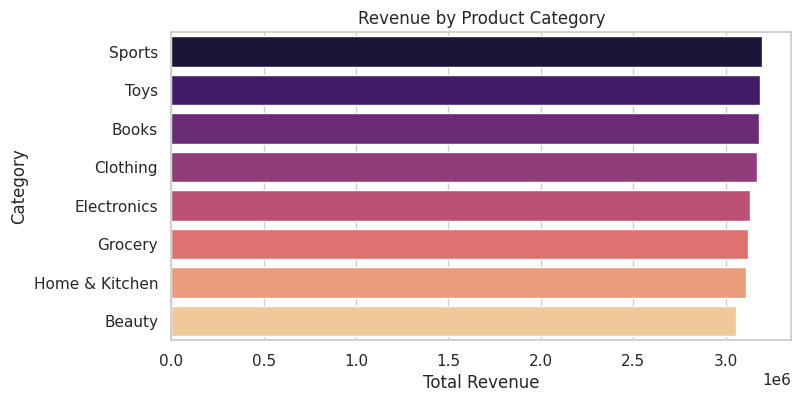

In [ ]:
# ---- Revenue by Product Category ----
category_rev = df.groupby("Product_Category")["Purchase_Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=category_rev.values, y=category_rev.index, palette="magma")
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.show()

/tmp/ipython-input-2523847126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_rev.values, y=payment_rev.index, palette="cubehelix")


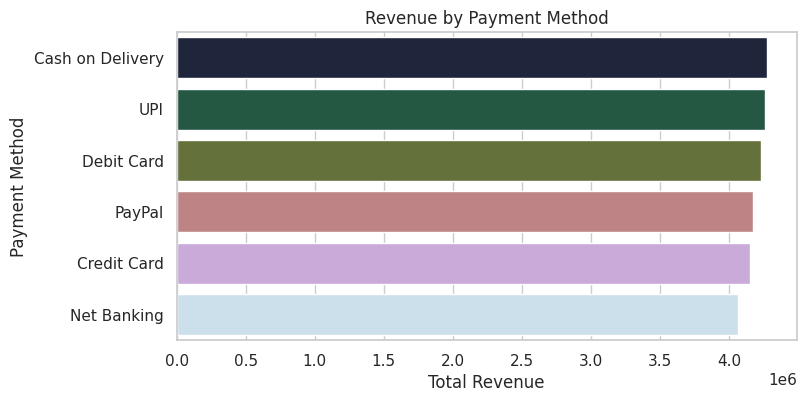

In [ ]:
# ---- Revenue by Payment Method ----
payment_rev = df.groupby("Payment_Method")["Purchase_Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=payment_rev.values, y=payment_rev.index, palette="cubehelix")
plt.title("Revenue by Payment Method")
plt.xlabel("Total Revenue")
plt.ylabel("Payment Method")
plt.show()


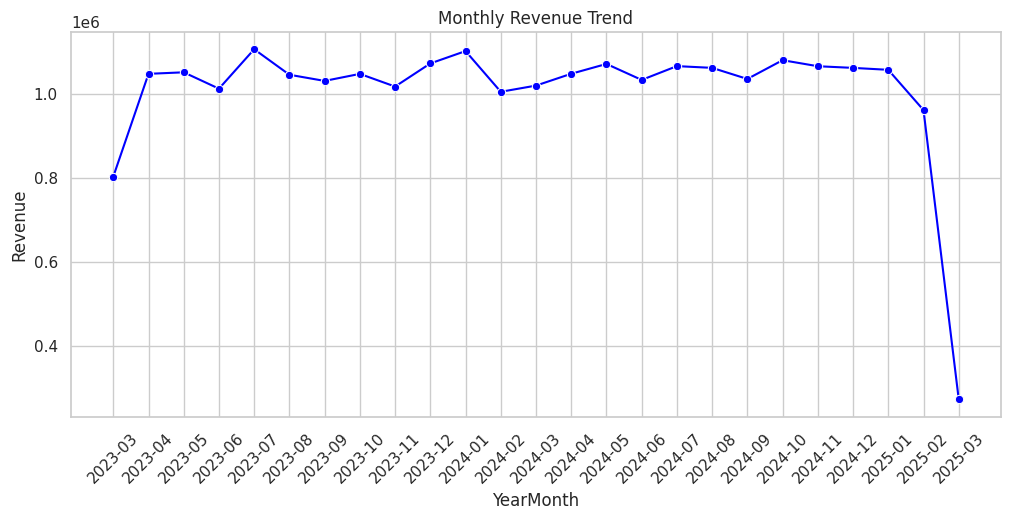

In [ ]:

# ---- Monthly Revenue Trend ----
monthly_trend = df.groupby("YearMonth")["Purchase_Amount"].sum().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_trend, x="YearMonth", y="Purchase_Amount", marker="o", color="blue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.show()


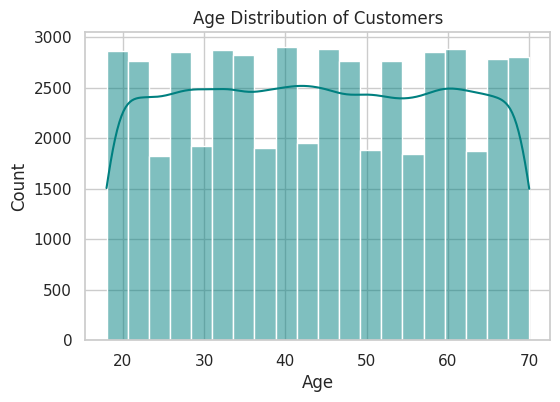

In [ ]:
# ---- Age Distribution ----
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="teal")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


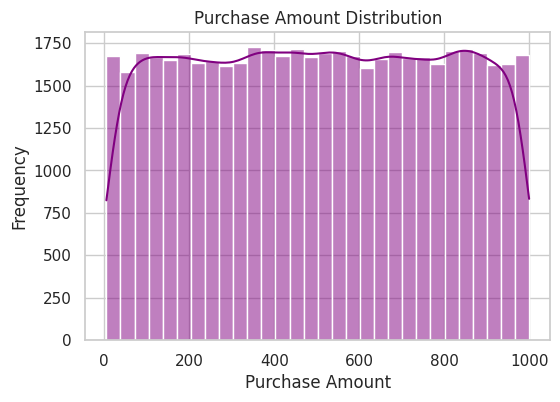

In [ ]:
# ---- Purchase Amount Distribution ----
plt.figure(figsize=(6,4))
sns.histplot(df["Purchase_Amount"], bins=30, kde=True, color="purple")
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-992691056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Product_Category", y="Purchase_Amount", data=df, palette="Set2")


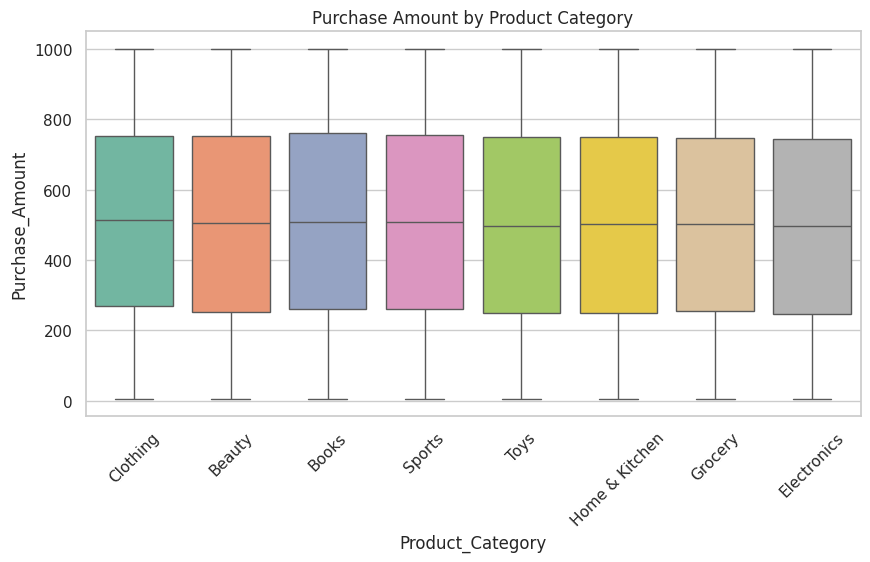

In [ ]:
# ---- Boxplot: Purchase Amount by Product Category ----
plt.figure(figsize=(10,5))
sns.boxplot(x="Product_Category", y="Purchase_Amount", data=df, palette="Set2")
plt.title("Purchase Amount by Product Category")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-4023549914.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_rev.values, y=country_rev.index, palette="viridis")


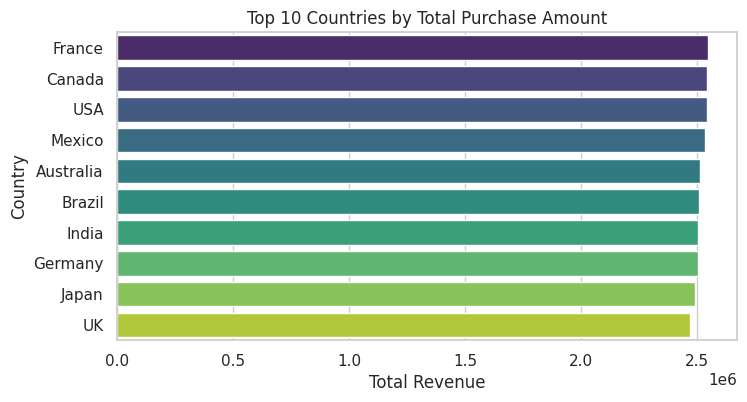

In [ ]:
# ---- Revenue by Country ----
country_rev = df.groupby("Country")["Purchase_Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=country_rev.values, y=country_rev.index, palette="viridis")
plt.title("Top 10 Countries by Total Purchase Amount")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()

In [ ]:
# 6. Quick Insights
# =========================================
print("\nTop 5 Countries by Transactions:\n", df["Country"].value_counts().head(5))
print("\nTop 5 Product Categories:\n", df["Product_Category"].value_counts().head(5))
print("\nPayment Method Split:\n", df["Payment_Method"].value_counts())
print("\nMonthly Revenue Sample:\n", monthly_trend.head())



Top 5 Countries by Transactions:
 Country
Canada     5082
Mexico     5059
Germany    5047
India      4996
France     4993
Name: count, dtype: int64

Top 5 Product Categories:
 Product_Category
Toys           6392
Electronics    6320
Sports         6312
Books          6253
Clothing       6224
Name: count, dtype: int64

Payment Method Split:
 Payment_Method
UPI                 8477
Cash on Delivery    8434
Debit Card          8355
Credit Card         8310
PayPal              8250
Net Banking         8174
Name: count, dtype: int64

Monthly Revenue Sample:
   YearMonth  Purchase_Amount
0   2023-03        802390.44
1   2023-04       1046921.48
2   2023-05       1050553.40
3   2023-06       1011635.06
4   2023-07       1105402.88


In [ ]:
# =========================================
# 7. Save Cleaned Data
# =========================================
df.to_csv("ecommerce_transactions_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as ecommerce_transactions_cleaned.csv")



✅ Cleaned dataset saved as ecommerce_transactions_cleaned.csv


In [3]:
import os
print(os.getcwd())


/content
